<a href="https://colab.research.google.com/github/highRisk911/Lab1/blob/main/LR4/LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 4
Іщенка Дмитра
 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

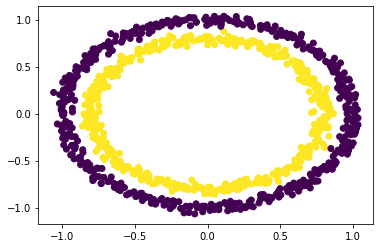

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
circles = pd.DataFrame({'x0': X[:, 0], 'x1': X[:, 1], 'label': y})

plt.scatter(X[:, 0], X[:, 1], c=y)

# Build model for classification

In [ ]:
 
tf.random.set_seed(42)
 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])
 
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)



32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
   
  y_pred = model.predict(x_in)
 
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...") 
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
   
  plt.contourf(xx, yy, y_pred, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5000
[0.6939496994018555, 0.5]
doing multiclass classification...


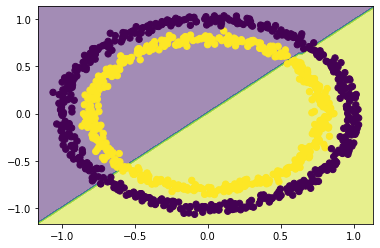

In [ ]:
 
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1),  
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)
print(model_2.evaluate(X, y))

plot_decision_boundary(model_2, X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.9960
[0.1046692430973053, 0.9959999918937683]
doing binary classifcation...


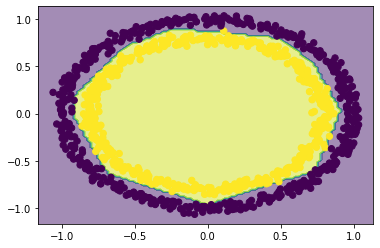

In [ ]:
 
model_smart = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_smart.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model_smart.fit(X, y, epochs=120, verbose=0)
print(model_smart.evaluate(X, y))

plot_decision_boundary(model_smart, X, y)

## Evaluating and improving our classification model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

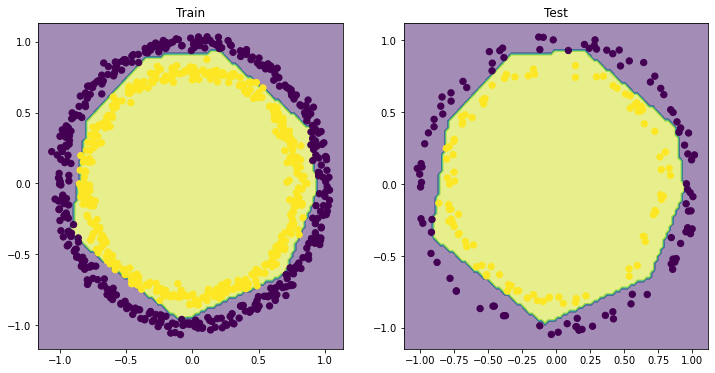

In [ ]:
tf.random.set_seed(42)

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape

model_improved = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_improved.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.01), metrics=['accuracy'])

history = model_improved.fit(X_train, y_train, epochs=25)
 
loss, accuracy = model_improved.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {100*accuracy:.2f}%')
 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_improved, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_improved, X=X_test, y=y_test)

plt.show()


Text(0.5, 1.0, 'Model properties')

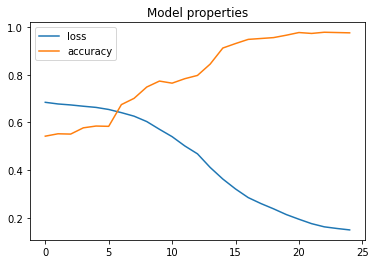

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('Model properties')

## Find the best learning rate value

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

Text(0.5, 1.0, 'Learning rate vs. loss')

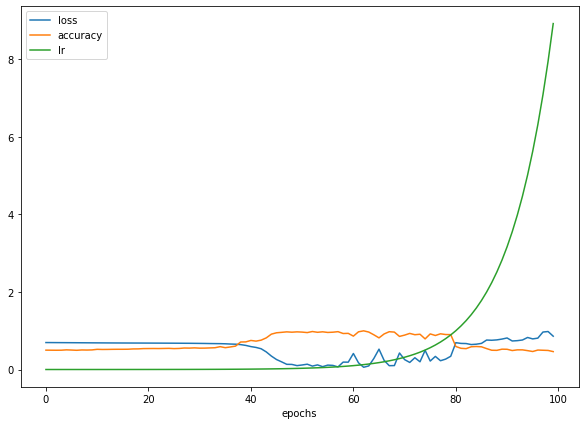

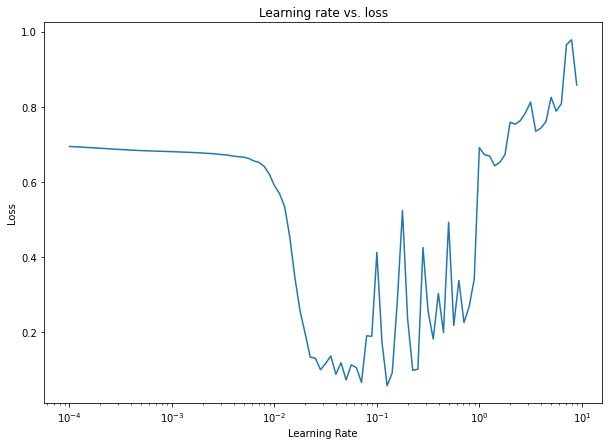

In [ ]:
tf.random.set_seed(42)

model_with_dynamic_lr = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_with_dynamic_lr.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_with_dynamic_lr.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

lrs = 1e-4 * (10 ** (np.arange(100)/20))

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

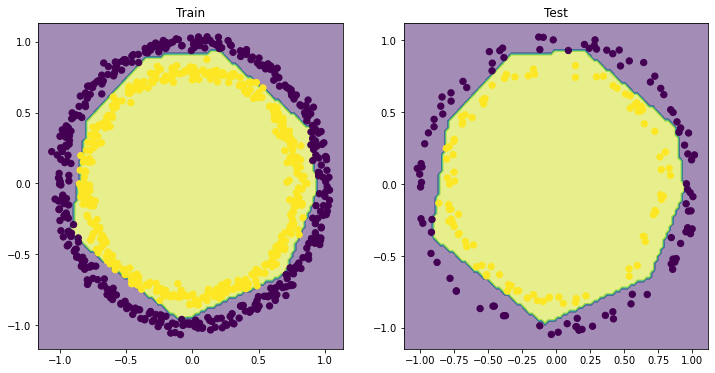

In [ ]:
 
tf.random.set_seed(42)

model_with_ideal_lr = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_with_ideal_lr.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.02), metrics=['accuracy'])

model_with_ideal_lr.fit(X_train, y_train, epochs=20)
model_with_ideal_lr.evaluate(X_test, y_test)
 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_improved, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_improved, X=X_test, y=y_test)

plt.show()

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
 
y_pred = model_with_ideal_lr.predict(X_test)
 
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

# Fashion mnist

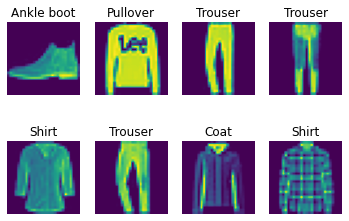

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
 
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape
 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_data[1])
plt.title(class_names[train_labels[1]])

for i in range(8):
  ax = plt.subplot(2, 4, i + 1)
  plt.imshow(test_data[i])
  plt.title(class_names[test_labels[i]])
  plt.axis(False)

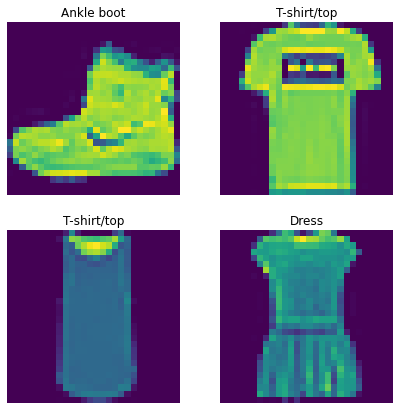

In [ ]:
# plot several items from dataset

plt.figure(figsize=(7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(train_data[i])
  plt.title(class_names[train_labels[i]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_fashion_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model_fashion_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

non_norm_history = model_fashion_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

# normalizing values
train_data = train_data / 255.0
test_data = test_data / 255.0

model_fashion_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model_fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

norm_history = model_fashion_2.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

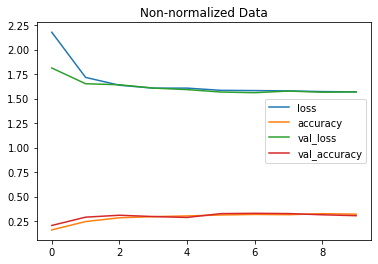

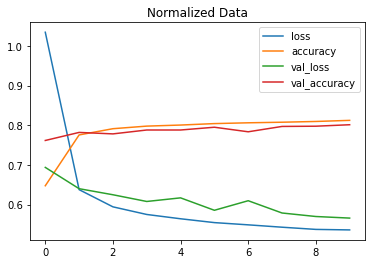

In [ ]:
 

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized Data")

In [ ]:
 
tf.random.set_seed(42)

model_fashion_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")  
])

model_fashion_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_fashion_3.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the ideal learning rate')

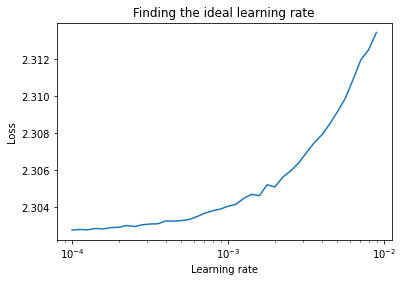

In [ ]:
lrs = 1e-4 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])  
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [ ]:
 
tf.random.set_seed(42)

model_fashion_ideal_lr = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model_fashion_ideal_lr.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

history = model_fashion_ideal_lr.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

def filter_dataset(data, labels):
  sorted_data, sorted_labels = [], []

  for i in range(len(labels)):
    if labels[i] == 0:
      sorted_data.append(data[i])
      sorted_labels.append(0)
    elif labels[i] == 3:
      sorted_data.append(data[i])
      sorted_labels.append(1)
    elif labels[i] == 7:
      sorted_data.append(data[i])
      sorted_labels.append(2)

  sorted_data = tf.constant(sorted_data, dtype="float32") / 255.0
  sorted_labels = tf.constant(sorted_labels)

  return sorted_data, sorted_labels


needed_train_data, needed_labels = filter_dataset(train_data, train_labels)
needed_test_data, needed_test_labels = filter_dataset(test_data, test_labels)

model_fashion_ideal_lr = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])

model_fashion_ideal_lr.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
history = model_fashion_ideal_lr.fit(needed_train_data, needed_labels, epochs=10, validation_data=(needed_test_data, needed_test_labels))


Epoch 1/10
563/563 [==============================] - 3s 4ms/step - loss: 0.1999 - accuracy: 0.9335 - val_loss: 0.1277 - val_accuracy: 0.9630
Epoch 2/10
563/563 [==============================] - 2s 4ms/step - loss: 0.1047 - accuracy: 0.9710 - val_loss: 0.1059 - val_accuracy: 0.9703
Epoch 3/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0937 - accuracy: 0.9732 - val_loss: 0.0998 - val_accuracy: 0.9717
Epoch 4/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.1000 - val_accuracy: 0.9737
Epoch 5/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0813 - accuracy: 0.9763 - val_loss: 0.1100 - val_accuracy: 0.9643
Epoch 6/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0790 - accuracy: 0.9758 - val_loss: 0.0966 - val_accuracy: 0.9697
Epoch 7/10
563/563 [==============================] - 2s 4ms/step - loss: 0.0744 - accuracy: 0.9767 - val_loss: 0.0909 - val_accuracy: 0.9713
Epoch 

94/94 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9687
0.09580802172422409 0.968666672706604


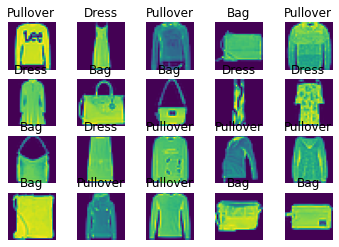

In [ ]:
 

loss, acc = model_fashion_ideal_lr.evaluate(needed_test_data, needed_test_labels)
print(loss, acc)

y_pred = model_fashion_ideal_lr.predict(needed_test_data)
 
class_names = ['Pullover', 'Dress', 'Bag']

for i in range(20):
  ax = plt.subplot(4, 5, i + 1)
  plt.imshow(needed_test_data[i])
  plt.title(class_names[np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]])
  plt.axis(False)

# Висновок
На лабораторній роботі було використано нейронні мережі з бібліотеки Keras та TensorFlow. Було встановлено, що на тренування впливає багато речей, тому, щоб досягти певної точності необхідно додаткова підготовити дані, обрати правильні налаштування мережі (швидкість навчання, кількість прихованих шарів і т.д.). 
Отже, після базових налаштувань, вдалося отримати точність для набору даних fashion_mnist приблизно 99%.